In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import *
import seaborn as sns

In [2]:
# 輸入原始結果
raw_result = pd.read_excel("..//result//ML-result-20220922.xlsx")

In [14]:
# 針對 fpr, tpr 的資料型態做轉換
for i in ["fpr", "tpr"]:
    raw_result[i] = raw_result[i].apply(lambda x: eval(x))

C:\Users\Jian_An Wang\AppData\Local\Temp\ipykernel_12752\2314275217.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_result[i] = raw_result[i].apply(lambda x: eval(x))


In [5]:
# 挑選出 "_FULL" 的模型
raw_result = raw_result[raw_result["Model"].apply(lambda x: True if "_FULL" in x else False)].reset_index(drop = True)

In [7]:
# 挑選出 test 的資料
raw_result = raw_result.query("Set == 'test'")

In [8]:
# 挑彙整出所有模型
unique_model = raw_result["Model"].unique().tolist()

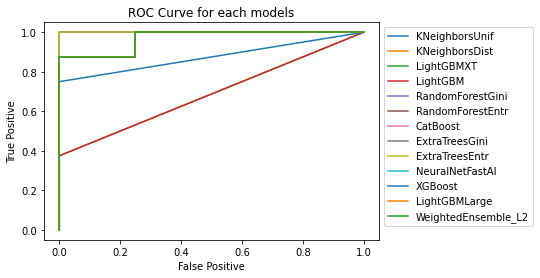

In [55]:
# 繪製 ROC Curve
for one_index, one_row in raw_result[["Model", "fpr", "tpr"]].reset_index(drop = True).iterrows():
    plt.plot(one_row["fpr"], one_row["tpr"], label = one_row["Model"].replace("_FULL", "").replace("\\T0", ""))

plt.legend(bbox_to_anchor = (1, 1))
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("ROC Curve for each models")
plt.show()

In [45]:
one_row["Model"]

'WeightedEnsemble_L2_FULL'

In [16]:
raw_result

,Model,Features,Set,Number_of_Data,F1-Score_for_1,F1-Score_for_0,Macro F1-Score,Micro F1-Score,prc_auc_1,prc_auc_0,...,Recall_for_0,Macro Recall,Micro Recall,Accuracy,ROC-AUC,fpr,tpr,True_value,Predict_value,Predict_prob_value
2,KNeighborsUnif_FULL,"['Arterial_Mean', 'Arterial_Std', 'Arterial_Mi...",test,12,0.875000,0.750000,0.812500,0.833333,0.985243,0.187342,...,0.75,0.8125,0.833333,0.833333,0.96875,"[0.0, 0.0, 0.0, 0.25, 0.25, 0.75, 1.0]","[0.0, 0.75, 0.875, 0.875, 1.0, 1.0, 1.0]","[0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1]","[0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1]","[0.20000000298023224, 0.800000011920929, 1.0, ..."
5,KNeighborsDist_FULL,"['Arterial_Mean', 'Arterial_Std', 'Arterial_Mi...",test,12,0.875000,0.750000,0.812500,0.833333,0.985243,0.189362,...,0.75,0.8125,0.833333,0.833333,0.96875,"[0.0, 0.0, 0.0, 0.25, 0.25, 1.0]","[0.0, 0.75, 0.875, 0.875, 1.0, 1.0]","[0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1]","[0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1]","[0.05654335394501686, 0.5689933896064758, 1.0,..."
8,LightGBMXT\T0_FULL,"['Arterial_Mean', 'Arterial_Std', 'Arterial_Mi...",test,12,0.800000,0.000000,0.400000,0.666667,0.895833,0.166667,...,0.00,0.5000,0.666667,0.666667,0.68750,"[0.0, 0.0, 1.0]","[0.0, 0.375, 1.0]","[0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[0.754398763179779, 0.754398763179779, 0.75439..."
11,LightGBM\T0_FULL,"['Arterial_Mean', 'Arterial_Std', 'Arterial_Mi...",test,12,0.800000,0.000000,0.400000,0.666667,0.895833,0.166667,...,0.00,0.5000,0.666667,0.666667,0.68750,"[0.0, 0.0, 1.0]","[0.0, 0.375, 1.0]","[0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[0.754398763179779, 0.754398763179779, 0.75439..."
14,RandomForestGini_FULL,"['Arterial_Mean', 'Arterial_Std', 'Arterial_Mi...",test,12,0.933333,0.888889,0.911111,0.916667,0.985243,0.189362,...,1.00,0.9375,0.916667,0.916667,0.96875,"[0.0, 0.0, 0.0, 0.25, 0.25, 1.0]","[0.0, 0.75, 0.875, 0.875, 1.0, 1.0]","[0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1]","[0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1]","[0.01666666753590107, 0.41333332657814026, 1.0..."
17,RandomForestEntr_FULL,"['Arterial_Mean', 'Arterial_Std', 'Arterial_Mi...",test,12,0.933333,0.888889,0.911111,0.916667,0.985243,0.189362,...,1.00,0.9375,0.916667,0.916667,0.96875,"[0.0, 0.0, 0.0, 0.25, 0.25, 1.0]","[0.0, 0.75, 0.875, 0.875, 1.0, 1.0]","[0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1]","[0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1]","[0.01666666753590107, 0.4099999964237213, 1.0,..."
20,CatBoost\T0_FULL,"['Arterial_Mean', 'Arterial_Std', 'Arterial_Mi...",test,12,0.941176,0.857143,0.899160,0.916667,1.000000,0.180556,...,0.75,0.8750,0.916667,0.916667,1.00000,"[0.0, 0.0, 0.0, 0.25, 1.0]","[0.0, 0.25, 1.0, 1.0, 1.0]","[0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1]","[0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1]","[0.48379310965538025, 0.5090695023536682, 0.52..."
23,ExtraTreesGini_FULL,"['Arterial_Mean', 'Arterial_Std', 'Arterial_Mi...",test,12,1.000000,1.000000,1.000000,1.000000,1.000000,0.187626,...,1.00,1.0000,1.000000,1.000000,1.00000,"[0.0, 0.0, 0.0, 1.0]","[0.0, 0.375, 1.0, 1.0]","[0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1]","[0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1]","[0.01666666753590107, 0.5566666722297668, 0.98..."
26,ExtraTreesEntr_FULL,"['Arterial_Mean', 'Arterial_Std', 'Arterial_Mi...",test,12,1.000000,1.000000,1.000000,1.000000,1.000000,0.187626,...,1.00,1.0000,1.000000,1.000000,1.00000,"[0.0, 0.0, 0.0, 1.0]","[0.0, 0.375, 1.0, 1.0]","[0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1]","[0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1]","[0.02666666731238365, 0.5533333420753479, 0.98..."
29,NeuralNetFastAI_FULL,"['Arterial_Mean', 'Arterial_Std', 'Arterial_Mi...",test,12,0.857143,0.800000,0.828571,0.833333,0.985243,0.189362,...,1.00,0.8750,0.833333,0.833333,0.96875,"[0.0, 0.0, 0.0, 0.25, 0.25, 1.0]","[0.0, 0.125, 0.875, 0.875, 1.0, 1.0]","[0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1]","[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1]","[0.032783009111881256, 0.37209171056747437, 0...."
